# MTH-IDS Adoption Using IoTID20
This is an adoption of the method described in the paper entitled "[**MTH-IDS: A Multi-Tiered Hybrid Intrusion Detection System for Internet of Vehicles**](https://arxiv.org/pdf/2105.13289.pdf)" accepted in IEEE Internet of Things Journal using UNSW-NB15 dataset to test its performance.  

## Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

In [3]:
#Read dataset
df = pd.read_csv('./data/IoT Network Intrusion Dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: './data/IoT Network Intrusion Dataset.csv'

In [ ]:
cols = (df.dtypes=='object')
object_cols = list(cols[cols].index)
object_cols

In [ ]:
x=[0,1,3,85]
df.drop(df.columns[x], axis = 1, inplace=True)
df.drop('Timestamp', axis=1, inplace = True)

In [ ]:
df

In [ ]:
df.Cat.value_counts()

In [ ]:
df.dtypes

In [ ]:
# Z-score normalization
features = df.dtypes[df.dtypes != 'object'].index
df[features] = df[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# Fill empty values by 0
df = df.fillna(0)

In [ ]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
df.iloc[:, -2] = labelencoder.fit_transform(df.iloc[:, -2])


In [ ]:
df.Cat.value_counts()

In [ ]:
X = df.drop(['Cat'],axis=1) 
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

In [ ]:
# Prepare the result output
output_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Time'])
output_index = list()

In [6]:
# use k-means to cluster the data samples and select a proportion of data from each cluster
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=1000, random_state=0).fit(X)

NameError: name 'X' is not defined

In [4]:
klabel=kmeans.labels_
df['klabel']=klabel

NameError: name 'kmeans' is not defined

In [5]:
df['klabel'].value_counts()

NameError: name 'df' is not defined

In [16]:
cols = list(df)
cols.insert(81, cols.pop(cols.index('Cat')))
df = df.loc[:, cols]

In [17]:
def typicalSampling(group):
    name = group.name
    frac = 0.04 #0.008
    return group.sample(frac=frac)

result = df.groupby(
    'klabel', group_keys=False
).apply(typicalSampling)

In [18]:
result['Cat'].value_counts()

2    16641
4     3005
0     2379
3     1603
1     1400
Name: Cat, dtype: int64

In [19]:
result

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,klabel,Cat
443865,0.163983,-0.908473,-0.738205,-0.141395,-0.388765,0.435813,-0.491223,1.135676,-0.633481,-0.591889,...,-0.017052,-0.047774,-0.054003,-0.171089,-0.045443,-0.146709,-0.168882,0,0,2
315362,0.157026,-0.908473,-0.738205,-0.146829,-0.388765,0.435813,-0.491223,1.135676,-0.633481,-0.591889,...,-0.017052,-0.047774,-0.054003,-0.180081,-0.045443,-0.153337,-0.178717,0,0,2
55376,0.157026,-0.908473,-0.738205,-0.145113,-0.388765,0.435813,-0.491223,1.135676,-0.633481,-0.591889,...,-0.017052,-0.047774,-0.054003,-0.177242,-0.045443,-0.151244,-0.175611,0,0,2
400308,0.167139,-0.908473,-0.738205,-0.139965,-0.388765,0.435813,-0.491223,1.135676,-0.633481,-0.591889,...,-0.017052,-0.047774,-0.054003,-0.168723,-0.045443,-0.144965,-0.166294,0,0,2
70457,0.164064,-0.908473,-0.738205,-0.147687,-0.388765,0.435813,-0.491223,1.135676,-0.633481,-0.591889,...,-0.017052,-0.047774,-0.054003,-0.181501,-0.045443,-0.154384,-0.180270,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48524,-1.051984,2.070041,-0.738205,-0.157696,-0.156745,-0.384201,0.703399,0.264886,1.606761,1.768006,...,-0.017052,-0.047774,-0.054003,-0.198065,-0.045443,-0.166594,-0.198386,0,999,4
302238,-1.051984,2.069300,-0.738205,-0.158840,-0.156745,-0.384201,0.703399,0.264886,1.606761,1.768006,...,-0.017052,-0.047774,-0.054003,-0.199959,-0.045443,-0.167989,-0.200457,0,999,4
150245,-1.051984,2.071295,-0.738205,-0.158840,-0.156745,-0.384201,0.703399,0.264886,1.606761,1.768006,...,-0.017052,-0.047774,-0.054003,-0.199959,-0.045443,-0.167989,-0.200457,0,999,4
623609,-1.051984,2.071295,-0.738205,-0.156552,-0.156745,-0.384201,0.703399,0.264886,1.606761,1.768006,...,-0.017052,-0.047774,-0.054003,-0.196172,-0.045443,-0.165198,-0.196316,0,999,4


In [20]:
result = result.drop(['klabel'],axis=1)
#result = result.append(df_minor)

In [21]:
result.to_csv('./data/IoTID20_sample_km.csv',index=0)

In [22]:
df=pd.read_csv('./data/IoTID20_sample_km.csv')

In [23]:
X = df.drop(['Cat'],axis=1).values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [ ]:
# Prepare the result output
output_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Train_time', 'Predict_time_per_record', 'HPO_time'])
output_index = list()

In [25]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X_train, y_train)

In [26]:
# calculate the sum of importance scores
f_list = sorted(zip(map(lambda x: round(x, 4), importances), features), reverse=True)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])

In [27]:
# select the important features from top to bottom until the accumulated importance reaches 90%
f_list2 = sorted(zip(map(lambda x: round(x, 4), importances/Sum), features), reverse=True)
Sum2 = 0
fs = []
for i in range(0, len(f_list2)):
    Sum2 = Sum2 + f_list2[i][0]
    fs.append(f_list2[i][1])
    if Sum2>=0.9:
        break        

In [28]:
X_fs = df[fs].values

In [29]:
X_fs.shape

(25028, 39)

In [31]:
from FCBF_module import FCBF, FCBFK, FCBFiP, get_i
fcbf = FCBFK(k = 20)
#fcbf.fit(X_fs, y)

In [32]:
start_time = time.time()
X_fss = fcbf.fit_transform(X_fs,y)
end_time = time.time()

### 把FCBF添加到df中

In [42]:
# Add to output sheet
result_dict = {
    'Accuracy': np.NaN,
    'Precision': np.NaN,
    'Recall': np.NaN,
    'F1-Score': np.NaN,
    'Train_time': t2-t1,
    'Predict_time_per_record': np.NaN,
    'HPO_time': np.NaN
}
output_df = output_df.append(result_dict, ignore_index=True)
# Add index name
output_index.append('FCBF')

C:\Users\FOCUS\AppData\Local\Temp\ipykernel_5504\2143444498.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(result_dict, ignore_index=True)


In [33]:
X_fss.shape

(25028, 20)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_fss,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [35]:
X_train.shape

(20022, 20)

In [36]:
pd.Series(y_train).value_counts()

2    13313
4     2404
0     1903
3     1282
1     1120
dtype: int64

In [37]:
X_combined = np.concatenate((X_train, X_test), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)

## Machine learning model training

### Training four base learners: decision tree, random forest, extra trees, XGBoost

In [ ]:
# The length of the test set for prediction time measurement
len_test = X_test.shape[0]
# Prepare the output dir
output_dir = 'output/MTH-IDS/output-{}'.format(datetime.datetime.now().strftime('%y%m%d-%H%M%S'))
img_dir = os.path.join(output_dir, 'img')
os.makedirs(img_dir)
# Prepare the log file
log_file = open(os.path.join(output_dir, 'classification_report-{}'.format(datetime.datetime.now().strftime('%y%m%d-%H%M%S'))), 'w+')

#### Apply XGBoost

Accuracy of XGBoost: 0.9770275669196964
Precision of XGBoost: 0.976964090594952
Recall of XGBoost: 0.9770275669196964
F1-score of XGBoost: 0.976540536657341
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       476
           1       0.94      0.81      0.87       280
           2       0.97      1.00      0.98      3328
           3       0.99      0.96      0.98       321
           4       0.99      0.94      0.97       601

    accuracy                           0.98      5006
   macro avg       0.98      0.94      0.96      5006
weighted avg       0.98      0.98      0.98      5006



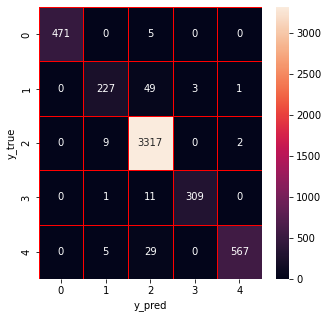

In [38]:
xg = xgb.XGBClassifier(n_estimators = 10)
t1 = time.time()
xg.fit(X_train,y_train)
t2 = time.time()
xg_score=xg.score(X_test,y_test)
t3 = time.time()
y_predict=xg.predict(X_test)
t4 = time.time()
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
report_str = classification_report(y_true,y_predict); log_file.write('******{}******\n'.format('XGBoost (Original)')+report_str+'\n'); print(report_str)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(18,14))
sns.heatmap(cm,annot=True,linewidth=1,linecolor="red",fmt=".0f",ax=ax)
ax.set_xticklabels(label_names)
ax.set_yticklabels(list(reversed(label_names)))
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.savefig(os.path.join(img_dir, 'XGBoost_original.pdf'))
plt.show()

In [43]:
# Add to output sheet
result_dict = {
    'Accuracy': xg_score,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': fscore,
    'Time': end_time-start_time
}
output_df = output_df.append(result_dict, ignore_index=True)
# Add index name
output_index.append('XGBoost (Original)')

C:\Users\FOCUS\AppData\Local\Temp\ipykernel_5504\1520904103.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(result_dict, ignore_index=True)


#### Hyperparameter optimization (HPO) of XGBoost using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [44]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate'])),

    }
    clf = xgb.XGBClassifier( **params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
}

start_time = time.time()

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)

end_time = time.time()

print("XGBoost: Hyperopt estimated optimum {}".format(best))

100%|███████████████████████████████████████████████| 20/20 [00:20<00:00,  1.02s/trial, best loss: -0.9902117459049141]
XGBoost: Hyperopt estimated optimum {'learning_rate': 1.0531782847176068, 'max_depth': 84.0, 'n_estimators': 90.0}


Accuracy of XGBoost: 0.9902117459049141
Precision of XGBoost: 0.9901616829282035
Recall of XGBoost: 0.9902117459049141
F1-score of XGBoost: 0.9901472948051812
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       476
           1       0.96      0.93      0.94       280
           2       0.99      1.00      0.99      3328
           3       1.00      0.98      0.99       321
           4       0.99      0.98      0.99       601

    accuracy                           0.99      5006
   macro avg       0.99      0.98      0.98      5006
weighted avg       0.99      0.99      0.99      5006



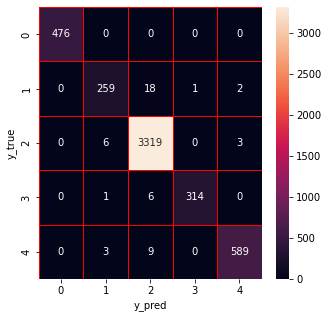

In [45]:
params = {
    'n_estimators': int(best['n_estimators']), 
    'max_depth': int(best['max_depth']),
    'learning_rate':  abs(float(best['learning_rate'])),
}
xg = xgb.XGBClassifier(**params)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [46]:
# Add to output sheet
result_dict = {
    'Accuracy': xg_score,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': fscore,
    'Time': end_time-start_time
}
output_df = output_df.append(result_dict, ignore_index=True)
# Add index name
output_index.append('XGBoost (BO-TPE)')

C:\Users\FOCUS\AppData\Local\Temp\ipykernel_5504\2706711560.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(result_dict, ignore_index=True)


In [47]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

#### Hyperparameter optimization (HPO) of XGBoost using Particle Swarm Optimization (PSO)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [48]:
#XGBoost
import optunity
import optunity.metrics

data= X_combined
labels= y_combined.tolist()
Y_train = y_train
Y_test = y_test
# Define the hyperparameter configuration space
search = {
    'n_estimators': [10, 100],
    'max_depth': [5,50],
    'learning_rate': [0.01, 0.9]
}
# Define the objective function
@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance(x_train, y_train, x_test, y_test,n_estimators=None, max_depth=None,learning_rate=None):
    # fit the model
    params = {
        'n_estimators': int(n_estimators), 
        'max_depth': int(max_depth),
        'learning_rate':  abs(float(learning_rate)),
    }
    model = xgb.XGBClassifier( **params)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    # scores=np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1,
    #                                 scoring="accuracy"))
    #return optunity.metrics.roc_auc(y_test, predictions, positive=True)
    return optunity.metrics.accuracy(Y_test, predictions)

start_time = time.time()

optimal_configuration, info, _ = optunity.maximize(performance,
                                                  solver_name='particle swarm',
                                                  num_evals=20,
                                                   **search
                                                  )

end_time = time.time()

print(optimal_configuration)
print("Accuracy:"+ str(info.optimum))

{'n_estimators': 55.263671875, 'max_depth': 38.7939453125, 'learning_rate': 0.777451171875}
Accuracy:0.9902117459049141


Accuracy of XGBoost: 0.9902117459049141
Precision of XGBoost: 0.9901758468976449
Recall of XGBoost: 0.9902117459049141
F1-score of XGBoost: 0.990156030690187
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       476
           1       0.96      0.93      0.94       280
           2       0.99      1.00      0.99      3328
           3       1.00      0.98      0.99       321
           4       0.99      0.98      0.99       601

    accuracy                           0.99      5006
   macro avg       0.99      0.98      0.98      5006
weighted avg       0.99      0.99      0.99      5006



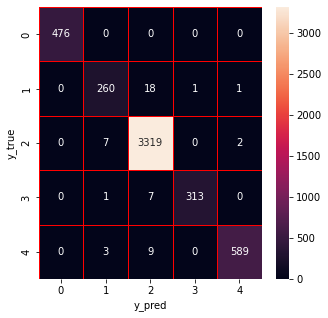

In [49]:
params = {
    'n_estimators': int(optimal_configuration['n_estimators']), 
    'max_depth': int(optimal_configuration['max_depth']), 
    'learning_rate': abs(float(optimal_configuration['learning_rate']))
}
xg = xgb.XGBClassifier(**params)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [50]:
# Add to output sheet
result_dict = {
    'Accuracy': xg_score,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': fscore,
    'Time': end_time-start_time
}
output_df = output_df.append(result_dict, ignore_index=True)
# Add index name
output_index.append('XGBoost (PSO)')

C:\Users\FOCUS\AppData\Local\Temp\ipykernel_5504\4140367054.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(result_dict, ignore_index=True)


#### Hyperparameter optimization (HPO) of XGBoost using Genetic Algorithm (GA)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [51]:
#Xgboost
from tpot import TPOTClassifier
# Define the hyperparameter configuration space
parameters = {
    'n_estimators': range(10,100),
    'max_depth': range(4,100),
    'learning_rate': [i/100 for i in range(1, 90)]
}
# Set the hyperparameters of GA                 
ga = TPOTClassifier(generations= 3, population_size= 10, offspring_size= 5,
                                 verbosity= 3, early_stop= 5,
                                 config_dict=
                                 {'xgboost.XGBClassifier': parameters}, 
                                 cv = 3, scoring = 'accuracy')
start_time = time.time()
ga.fit(X_combined, y_combined)
end_time = time.time()

C:\Users\FOCUS\.conda\envs\tf2\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


1 operators have been imported by TPOT.
                                                                                                                       
Generation 1 - Current Pareto front scores:
                                                                                                                       
-1	0.9872942831053452	XGBClassifier(CombineDFs(input_matrix, input_matrix), XGBClassifier__learning_rate=0.71, XGBClassifier__max_depth=16, XGBClassifier__n_estimators=56)
                                                                                                                       
Generation 2 - Current Pareto front scores:
                                                                                                                       
-1	0.9872942831053452	XGBClassifier(CombineDFs(input_matrix, input_matrix), XGBClassifier__learning_rate=0.71, XGBClassifier__max_depth=16, XGBClassifier__n_estimators=56)
                                                

In [52]:
# Helper method: convert the values represented by string to its correct type
def type_str(input_str:str):
    # is integer
    if input_str.isdecimal():
        return int(input_str)
    # is float
    elif input_str.isdigit():
        return float(input_str)
    # is string
    elif input_str.startswith('"') and input_str.endswith('"'):
        # remove quotation marks
        return input_str[1: -1]
    else:
        return input_str

# Extract the optimized parameter from the generated pipeline
def get_ga_optimized_parameters(fitted_tpot_obj: TPOTClassifier, classifier_name: str, temp_file_name:str='temp_ga_pipeline.py'):
    # Export the pipeline
    fitted_tpot_obj.export(output_file_name=temp_file_name)
    # Read the optimized pipeline
    with open(temp_file_name) as temp_file:
        lines = temp_file.readlines()
    for line in lines:
        if classifier_name+'(' in line.strip():
            pipeline = line
            break
    # Extract the optimized parameters
    start_index = pipeline.index(classifier_name+'(')
    end_index = pipeline.index(')')
    parameters_str = pipeline[start_index+len(classifier_name)+1: end_index]
    parameters = dict()
    for temp_str in parameters_str.split(sep=','):
        temp_list = temp_str.split('=')
        parameters[temp_list[0].strip()] = type_str(temp_list[1].strip())
    # Delect the temp file
    os.remove(temp_file_name)
    # Return the optimized parameters
    return parameters

Accuracy of XGBoost: 0.9890131841789852
Precision of XGBoost: 0.9889630089175048
Recall of XGBoost: 0.9890131841789852
F1-score of XGBoost: 0.988948159600958
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       476
           1       0.95      0.92      0.93       280
           2       0.99      1.00      0.99      3328
           3       1.00      0.98      0.99       321
           4       0.99      0.98      0.99       601

    accuracy                           0.99      5006
   macro avg       0.99      0.97      0.98      5006
weighted avg       0.99      0.99      0.99      5006



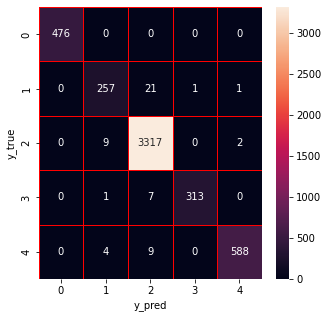

In [53]:
xg = xgb.XGBClassifier(**get_ga_optimized_parameters(ga, 'XGBClassifier'))
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [54]:
# Add to output sheet
result_dict = {
    'Accuracy': xg_score,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': fscore,
    'Time': end_time-start_time
}
output_df = output_df.append(result_dict, ignore_index=True)
# Add index name
output_index.append('XGBoost (GA)')

C:\Users\FOCUS\AppData\Local\Temp\ipykernel_5504\1504240222.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(result_dict, ignore_index=True)


#### Apply RF

Accuracy of RF: 0.9770275669196964
Precision of RF: 0.9767472252243914
Recall of RF: 0.9770275669196964
F1-score of RF: 0.9766847099500885
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       476
           1       0.90      0.82      0.86       280
           2       0.98      0.99      0.98      3328
           3       0.99      0.97      0.98       321
           4       0.99      0.95      0.97       601

    accuracy                           0.98      5006
   macro avg       0.97      0.95      0.96      5006
weighted avg       0.98      0.98      0.98      5006



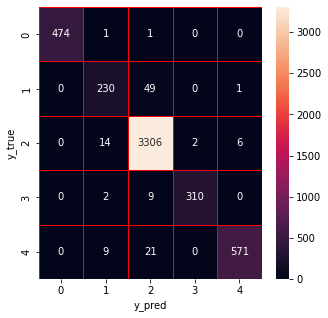

In [55]:
rf = RandomForestClassifier(random_state = 0)
start_time = time.time()
rf.fit(X_train,y_train)
end_time = time.time() 
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [56]:
# Add to output sheet
result_dict = {
    'Accuracy': rf_score,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': fscore,
    'Time': end_time-start_time
}
output_df = output_df.append(result_dict, ignore_index=True)
# Add index name
output_index.append('RF (Original)')

C:\Users\FOCUS\AppData\Local\Temp\ipykernel_5504\2961333033.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(result_dict, ignore_index=True)


#### Hyperparameter optimization (HPO) of random forest using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [57]:
# Hyperparameter optimization of random forest
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = RandomForestClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
available_criterion = ['gini','entropy']
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion', available_criterion)
}

start_time = time.time()

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)

end_time = time.time()

print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|███████████████████████████████████████████████| 20/20 [01:28<00:00,  4.45s/trial, best loss: -0.9846184578505793]
Random Forest: Hyperopt estimated optimum {'criterion': 0, 'max_depth': 43.0, 'max_features': 19.0, 'min_samples_leaf': 1.0, 'min_samples_split': 10.0, 'n_estimators': 141.0}


Accuracy of RF: 0.9842189372752697
Precision of RF: 0.9841016495267598
Recall of RF: 0.9842189372752697
F1-score of RF: 0.984066016556829
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       476
           1       0.94      0.88      0.91       280
           2       0.98      1.00      0.99      3328
           3       0.99      0.97      0.98       321
           4       0.99      0.97      0.98       601

    accuracy                           0.98      5006
   macro avg       0.98      0.96      0.97      5006
weighted avg       0.98      0.98      0.98      5006



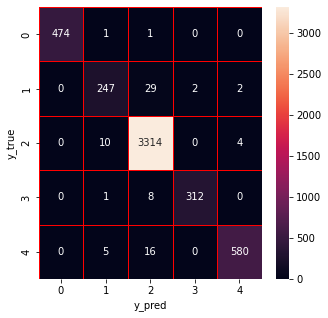

In [58]:
params = {
    'n_estimators': int(best['n_estimators']), 
    'max_depth': int(best['max_depth']),
    'max_features': int(best['max_features']),
    "min_samples_split":int(best['min_samples_split']),
    "min_samples_leaf":int(best['min_samples_leaf']),
    "criterion":available_criterion[int(best['criterion'])]
}
rf_hpo = RandomForestClassifier(**params)
rf_hpo.fit(X_train,y_train)
rf_score=rf_hpo.score(X_test,y_test)
y_predict=rf_hpo.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [59]:
# Add to output sheet
result_dict = {
    'Accuracy': rf_score,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': fscore,
    'Time': end_time-start_time
}
output_df = output_df.append(result_dict, ignore_index=True)
# Add index name
output_index.append('RF (BO-TPE)')

C:\Users\FOCUS\AppData\Local\Temp\ipykernel_5504\2995227766.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(result_dict, ignore_index=True)


In [60]:
rf_train=rf_hpo.predict(X_train)
rf_test=rf_hpo.predict(X_test)

#### Hyperparameter optimization (HPO) of random forest using Particle Swarm Optimization (PSO)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [61]:
#Random Forest
import optunity
import optunity.metrics

data=X
labels=y.tolist()
Y_train = y_train
Y_test = y_test
# Define the hyperparameter configuration space
search = {
    'n_estimators': [10, 100],
    'max_features': [1, 20],
    'max_depth': [5,50],
    "min_samples_split":[2,11],
    "min_samples_leaf":[1,11],
    "criterion":[0,1]
         }
available_criterion = ['gini', 'entropy']
# Define the objective function
@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance(x_train, y_train, x_test, y_test,n_estimators=None, max_features=None,max_depth=None,min_samples_split=None,min_samples_leaf=None,criterion=None):
    # fit the model
    if criterion<0.5:
        cri=available_criterion[0]
    else:
        cri=available_criterion[1]
    model = RandomForestClassifier(n_estimators=int(n_estimators),
                                   max_features=int(max_features),
                                   max_depth=int(max_depth),
                                   min_samples_split=int(min_samples_split),
                                   min_samples_leaf=int(min_samples_leaf),
                                   criterion=cri,
                                  )
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    # scores=np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1,
    #                                 scoring="accuracy"))
    #return optunity.metrics.roc_auc(y_test, predictions, positive=True)
    return optunity.metrics.accuracy(Y_test, predictions)

start_time = time.time()

optimal_configuration, info, _ = optunity.maximize(performance,
                                                  solver_name='particle swarm',
                                                  num_evals=20,
                                                   **search
                                                  )

end_time = time.time()

print(optimal_configuration)
print("Accuracy:"+ str(info.optimum))

{'n_estimators': 94.55078125, 'max_features': 11.724609375, 'max_depth': 26.181640625, 'min_samples_split': 3.529296875, 'min_samples_leaf': 1.33203125, 'criterion': 0.814453125}
Accuracy:0.9845518710880278


Accuracy of RF: 0.986016779864163
Precision of RF: 0.9859167945957082
Recall of RF: 0.986016779864163
F1-score of RF: 0.9858251274526116
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       476
           1       0.95      0.88      0.91       280
           2       0.98      1.00      0.99      3328
           3       1.00      0.98      0.99       321
           4       0.99      0.97      0.98       601

    accuracy                           0.99      5006
   macro avg       0.99      0.96      0.97      5006
weighted avg       0.99      0.99      0.99      5006



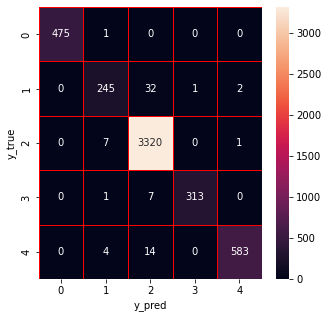

In [62]:
params = {
    'n_estimators': int(optimal_configuration['n_estimators']), 
    'min_samples_leaf': int(optimal_configuration['min_samples_leaf']), 
    'max_depth': int(optimal_configuration['max_depth']), 
    'min_samples_split': int(optimal_configuration['min_samples_split']), 
    'max_features': int(optimal_configuration['max_features']), 
    'criterion': available_criterion[int(optimal_configuration['criterion']+0.5)]
}
rf_hpo = RandomForestClassifier(**params)
rf_hpo.fit(X_train,y_train)
rf_score=rf_hpo.score(X_test,y_test)
y_predict=rf_hpo.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [63]:
# Add to output sheet
result_dict = {
    'Accuracy': rf_score,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': fscore,
    'Time': end_time-start_time
}
output_df = output_df.append(result_dict, ignore_index=True)
# Add index name
output_index.append('RF (PSO)')

C:\Users\FOCUS\AppData\Local\Temp\ipykernel_5504\4127134050.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(result_dict, ignore_index=True)


#### Hyperparameter optimization (HPO) of random forest using Genetic Algorithm (GA)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [64]:
#Random Forest
from tpot import TPOTClassifier
# Define the hyperparameter configuration space
parameters = {
    'n_estimators': range(20,200),
    "max_features":range(1,20),
    'max_depth': range(10,100),
    "min_samples_split":range(2,11),
    "min_samples_leaf":range(1,11),
    "criterion":['gini','entropy']
             }
# Set the hyperparameters of GA                 
ga = TPOTClassifier(generations= 3, population_size= 10, offspring_size= 5,
                                 verbosity= 3, early_stop= 5,
                                 config_dict=
                                 {'sklearn.ensemble.RandomForestClassifier': parameters}, 
                                 cv = 3, scoring = 'accuracy')
start_time = time.time()
ga.fit(X_combined, y_combined)
end_time = time.time()

1 operators have been imported by TPOT.
                                                                                                                       
Generation 1 - Current Pareto front scores:
                                                                                                                       
-1	0.9822199774993207	RandomForestClassifier(input_matrix, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_depth=78, RandomForestClassifier__max_features=13, RandomForestClassifier__min_samples_leaf=3, RandomForestClassifier__min_samples_split=3, RandomForestClassifier__n_estimators=38)
                                                                                                                       
Generation 2 - Current Pareto front scores:
                                                                                                                       
-1	0.9822199774993207	RandomForestClassifier(input_matrix, RandomForestClassifier

Accuracy of RF: 0.9808230123851378
Precision of RF: 0.980707631775805
Recall of RF: 0.9808230123851378
F1-score of RF: 0.9805828144713556
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       476
           1       0.93      0.85      0.89       280
           2       0.98      1.00      0.99      3328
           3       1.00      0.97      0.98       321
           4       0.99      0.96      0.98       601

    accuracy                           0.98      5006
   macro avg       0.98      0.95      0.97      5006
weighted avg       0.98      0.98      0.98      5006



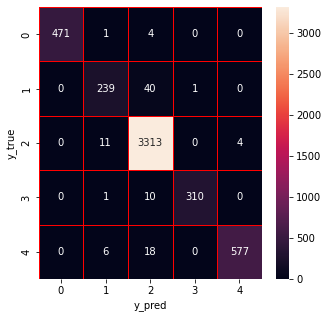

In [65]:
rf_hpo = RandomForestClassifier(**get_ga_optimized_parameters(ga, 'RandomForestClassifier'))
rf_hpo.fit(X_train,y_train)
rf_score=rf_hpo.score(X_test,y_test)
y_predict=rf_hpo.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [66]:
# Add to output sheet
result_dict = {
    'Accuracy': rf_score,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': fscore,
    'Time': end_time-start_time
}
output_df = output_df.append(result_dict, ignore_index=True)
# Add index name
output_index.append('RF (GA)')

C:\Users\FOCUS\AppData\Local\Temp\ipykernel_5504\2570225814.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(result_dict, ignore_index=True)


#### Apply DT

Accuracy of DT: 0.9822213343987215
Precision of DT: 0.9819935928438617
Recall of DT: 0.9822213343987215
F1-score of DT: 0.9820616639285412
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       476
           1       0.91      0.86      0.88       280
           2       0.99      0.99      0.99      3328
           3       0.99      0.98      0.99       321
           4       0.98      0.97      0.98       601

    accuracy                           0.98      5006
   macro avg       0.97      0.96      0.97      5006
weighted avg       0.98      0.98      0.98      5006



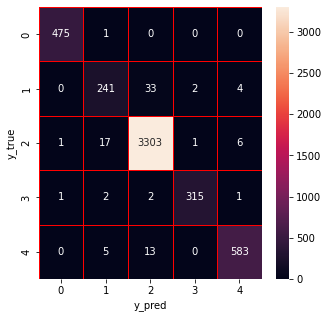

In [67]:
dt = DecisionTreeClassifier(random_state = 0)
start_time = time.time()
dt.fit(X_train,y_train)
end_time = time.time() 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [68]:
# Add to output sheet
result_dict = {
    'Accuracy': dt_score,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': fscore,
    'Time': end_time-start_time
}
output_df = output_df.append(result_dict, ignore_index=True)
# Add index name
output_index.append('DT (Original)')

C:\Users\FOCUS\AppData\Local\Temp\ipykernel_5504\2126059860.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(result_dict, ignore_index=True)


#### Hyperparameter optimization (HPO) of decision tree using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [69]:
# Hyperparameter optimization of decision tree
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = DecisionTreeClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
available_criterion = ['gini','entropy']
space = {
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',available_criterion)
}

start_time = time.time()

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50)

end_time = time.time()

print("Decision tree: Hyperopt estimated optimum {}".format(best))

100%|███████████████████████████████████████████████| 50/50 [00:03<00:00, 13.52trial/s, best loss: -0.9834198961246504]
Decision tree: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 36.0, 'max_features': 19.0, 'min_samples_leaf': 1.0, 'min_samples_split': 8.0}


Accuracy of DT: 0.981622053535757
Precision of DT: 0.9813793101414503
Recall of DT: 0.981622053535757
F1-score of DT: 0.9814044383576969
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       476
           1       0.91      0.85      0.88       280
           2       0.98      0.99      0.99      3328
           3       0.99      0.98      0.99       321
           4       0.99      0.96      0.97       601

    accuracy                           0.98      5006
   macro avg       0.97      0.96      0.97      5006
weighted avg       0.98      0.98      0.98      5006



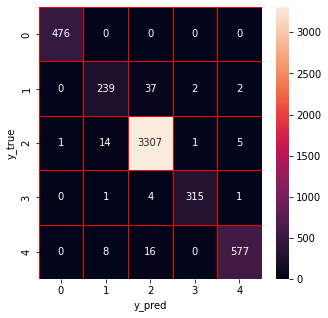

In [70]:
params = {
    'max_depth': int(best['max_depth']),
    'max_features': int(best['max_features']),
    "min_samples_split":int(best['min_samples_split']),
    "min_samples_leaf":int(best['min_samples_leaf']),
    "criterion":available_criterion[int(best['criterion'])]
}
dt_hpo = DecisionTreeClassifier(**params)
dt_hpo.fit(X_train,y_train)
dt_score=dt_hpo.score(X_test,y_test)
y_predict=dt_hpo.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [71]:
# Add to output sheet
result_dict = {
    'Accuracy': dt_score,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': fscore,
    'Time': end_time-start_time
}
output_df = output_df.append(result_dict, ignore_index=True)
# Add index name
output_index.append('DT (BO-TPE)')

C:\Users\FOCUS\AppData\Local\Temp\ipykernel_5504\399576673.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(result_dict, ignore_index=True)


In [72]:
dt_train=dt_hpo.predict(X_train)
dt_test=dt_hpo.predict(X_test)

#### Hyperparameter optimization (HPO) of decision tree using Particle Swarm Optimization (PSO)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [73]:
#Random Forest
import optunity
import optunity.metrics

data=X_train
labels=y_train.tolist()
Y_train = y_train
Y_test = y_test
# Define the hyperparameter configuration space
search = {
    'max_features': [1, 20],
    'max_depth': [5,50],
    "min_samples_split":[2,11],
    "min_samples_leaf":[1,11],
    "criterion":[0,1]
}
available_criterion = ['gini', 'entropy']
# Define the objective function
@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance(x_train, y_train, x_test, y_test,max_features=None,max_depth=None,min_samples_split=None,min_samples_leaf=None,criterion=None):
    # fit the model
    if criterion<0.5:
        cri=available_criterion[0]
    else:
        cri=available_criterion[1]
    model = DecisionTreeClassifier(max_features=int(max_features),
                                   max_depth=int(max_depth),
                                   min_samples_split=int(min_samples_split),
                                   min_samples_leaf=int(min_samples_leaf),
                                   criterion=cri,
                                  )
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    # scores=np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1,
                                    # scoring="accuracy"))
    # return optunity.metrics.roc_auc(y_test, predictions, positive=True)
    return optunity.metrics.accuracy(Y_test, predictions)

start_time = time.time()

optimal_configuration, info, _ = optunity.maximize(performance,
                                                  solver_name='particle swarm',
                                                  num_evals=20,
                                                   **search
                                                  )

end_time = time.time()

print(optimal_configuration)
print("Accuracy:"+ str(info.optimum))

{'max_features': 15.9365234375, 'max_depth': 48.5498046875, 'min_samples_split': 4.9267578125, 'min_samples_leaf': 1.869140625, 'criterion': 0.5341796875}
Accuracy:0.9820215741110667


Accuracy of DT: 0.9820215741110667
Precision of DT: 0.9818027700819023
Recall of DT: 0.9820215741110667
F1-score of DT: 0.9818583360500194
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       476
           1       0.91      0.86      0.88       280
           2       0.99      0.99      0.99      3328
           3       0.99      0.97      0.98       321
           4       0.97      0.97      0.97       601

    accuracy                           0.98      5006
   macro avg       0.97      0.96      0.97      5006
weighted avg       0.98      0.98      0.98      5006



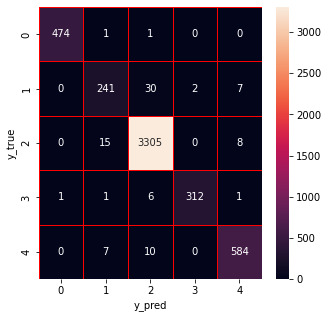

In [74]:
params = {
    'min_samples_leaf': int(optimal_configuration['min_samples_leaf']), 
    'max_depth': int(optimal_configuration['max_depth']), 
    'min_samples_split': int(optimal_configuration['min_samples_split']), 
    'max_features': int(optimal_configuration['max_features']), 
    'criterion': available_criterion[int(optimal_configuration['criterion']+0.5)]
}
dt_hpo = DecisionTreeClassifier(**params)
dt_hpo.fit(X_train,y_train)
dt_score=dt_hpo.score(X_test,y_test)
y_predict=dt_hpo.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [75]:
# Add to output sheet
result_dict = {
    'Accuracy': dt_score,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': fscore,
    'Time': end_time-start_time
}
output_df = output_df.append(result_dict, ignore_index=True)
# Add index name
output_index.append('DT (PSO)')

C:\Users\FOCUS\AppData\Local\Temp\ipykernel_5504\717813516.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(result_dict, ignore_index=True)


#### Hyperparameter optimization (HPO) of decision tree using Genetic Algorithm (GA)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [76]:
#Random Forest
from tpot import TPOTClassifier
# Define the hyperparameter configuration space
parameters = {
    "max_features":range(1,20),
    'max_depth': range(10,100),
    "min_samples_split":range(2,11),
    "min_samples_leaf":range(1,11),
    "criterion":['gini','entropy']
}
# Set the hyperparameters of GA                 
ga = TPOTClassifier(generations= 3, population_size= 10, offspring_size= 5,
                                 verbosity= 3, early_stop= 5,
                                 config_dict=
                                 {'sklearn.tree.DecisionTreeClassifier': parameters}, 
                                 cv = 3, scoring = 'accuracy')
start_time = time.time()
ga.fit(X_combined, y_combined)
end_time = time.time()

1 operators have been imported by TPOT.
                                                                                                                       
Generation 1 - Current Pareto front scores:
                                                                                                                       
-1	0.9703532729652878	DecisionTreeClassifier(CombineDFs(input_matrix, input_matrix), DecisionTreeClassifier__criterion=gini, DecisionTreeClassifier__max_depth=65, DecisionTreeClassifier__max_features=18, DecisionTreeClassifier__min_samples_leaf=10, DecisionTreeClassifier__min_samples_split=3)
                                                                                                                       
-2	0.9791433785286651	DecisionTreeClassifier(DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=gini, DecisionTreeClassifier__max_depth=51, DecisionTreeClassifier__max_features=19, DecisionTreeClassifier__min_samples_leaf=7, DecisionTreeClass

Accuracy of DT: 0.9832201358369956
Precision of DT: 0.9830927559084582
Recall of DT: 0.9832201358369956
F1-score of DT: 0.9831259209915663
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       476
           1       0.92      0.89      0.90       280
           2       0.99      0.99      0.99      3328
           3       0.99      0.97      0.98       321
           4       0.98      0.97      0.97       601

    accuracy                           0.98      5006
   macro avg       0.97      0.96      0.97      5006
weighted avg       0.98      0.98      0.98      5006



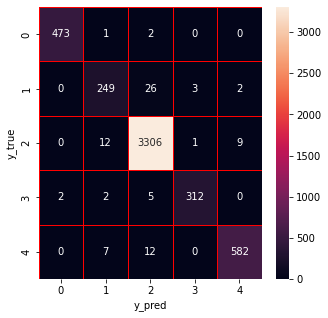

In [77]:
dt_hpo = DecisionTreeClassifier(**get_ga_optimized_parameters(ga, 'DecisionTreeClassifier'))
dt_hpo.fit(X_train,y_train)
dt_score=dt_hpo.score(X_test,y_test)
y_predict=dt_hpo.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [78]:
# Add to output sheet
result_dict = {
    'Accuracy': dt_score,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': fscore,
    'Time': end_time-start_time
}
output_df = output_df.append(result_dict, ignore_index=True)
# Add index name
output_index.append('DT (GA)')

C:\Users\FOCUS\AppData\Local\Temp\ipykernel_5504\684755246.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(result_dict, ignore_index=True)


#### Apply ET

Accuracy of ET: 0.9702357171394327
Precision of ET: 0.9696153110345163
Recall of ET: 0.9702357171394327
F1-score of ET: 0.9696991375004366
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       476
           1       0.88      0.78      0.82       280
           2       0.97      0.99      0.98      3328
           3       0.98      0.95      0.97       321
           4       0.97      0.95      0.96       601

    accuracy                           0.97      5006
   macro avg       0.96      0.93      0.95      5006
weighted avg       0.97      0.97      0.97      5006



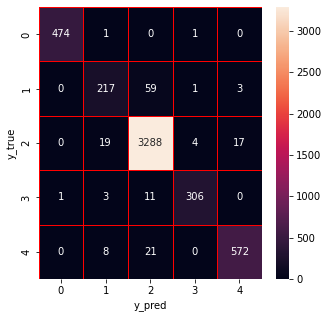

In [79]:
et = ExtraTreesClassifier(random_state = 0)
start_time = time.time()
et.fit(X_train,y_train)
end_time = time.time() 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [80]:
# Add to output sheet
result_dict = {
    'Accuracy': et_score,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': fscore,
    'Time': end_time-start_time
}
output_df = output_df.append(result_dict, ignore_index=True)
# Add index name
output_index.append('ET (Original)')

C:\Users\FOCUS\AppData\Local\Temp\ipykernel_5504\2068824918.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(result_dict, ignore_index=True)


#### Hyperparameter optimization (HPO) of extra trees using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [81]:
# Hyperparameter optimization of extra trees
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = ExtraTreesClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
available_criterion = ['gini','entropy']
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',available_criterion)
}

start_time = time.time()

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)

end_time = time.time()

print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|███████████████████████████████████████████████| 20/20 [00:43<00:00,  2.20s/trial, best loss: -0.9792249300838993]
Random Forest: Hyperopt estimated optimum {'criterion': 0, 'max_depth': 24.0, 'max_features': 17.0, 'min_samples_leaf': 4.0, 'min_samples_split': 5.0, 'n_estimators': 189.0}


Accuracy of ET: 0.9788254095085897
Precision of ET: 0.9787108904421562
Recall of ET: 0.9788254095085897
F1-score of ET: 0.9784558805649569
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       476
           1       0.94      0.83      0.88       280
           2       0.98      1.00      0.99      3328
           3       0.99      0.96      0.97       321
           4       0.99      0.96      0.97       601

    accuracy                           0.98      5006
   macro avg       0.98      0.95      0.96      5006
weighted avg       0.98      0.98      0.98      5006



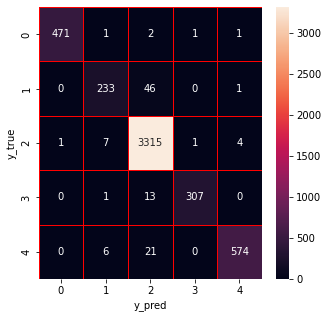

In [82]:
params = {
    'n_estimators': int(best['n_estimators']), 
    'max_depth': int(best['max_depth']),
    'max_features': int(best['max_features']),
    "min_samples_split":int(best['min_samples_split']),
    "min_samples_leaf":int(best['min_samples_leaf']),
    "criterion":available_criterion[int(best['criterion'])]
}
et_hpo = ExtraTreesClassifier(**params)
et_hpo.fit(X_train,y_train) 
et_score=et_hpo.score(X_test,y_test)
y_predict=et_hpo.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [83]:
# Add to output sheet
result_dict = {
    'Accuracy': et_score,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': fscore,
    'Time': end_time-start_time
}
output_df = output_df.append(result_dict, ignore_index=True)
# Add index name
output_index.append('ET (BO-TPE)')

C:\Users\FOCUS\AppData\Local\Temp\ipykernel_5504\1015509880.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(result_dict, ignore_index=True)


In [84]:
et_train=et_hpo.predict(X_train)
et_test=et_hpo.predict(X_test)

#### Hyperparameter optimization (HPO) of extra trees using Particle Swarm Optimization (PSO)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [85]:
#Random Forest
import optunity
import optunity.metrics

data=X_train
labels=y_train.tolist()
Y_train = y_train
Y_test = y_test
# Define the hyperparameter configuration space
search = {
    'n_estimators': [10, 200],
    'max_features': [1, 20],
    'max_depth': [5,50],
    "min_samples_split":[2,11],
    "min_samples_leaf":[1,11],
    "criterion":[0,1]
}
available_criterion = ['gini', 'entropy']
# Define the objective function
@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance(x_train, y_train, x_test, y_test,n_estimators=None,max_features=None,max_depth=None,min_samples_split=None,min_samples_leaf=None,criterion=None):
    # fit the model
    if criterion<0.5:
        cri=available_criterion[0]
    else:
        cri=available_criterion[1]
    model = ExtraTreesClassifier(n_estimators=int(n_estimators),
                                   max_features=int(max_features),
                                   max_depth=int(max_depth),
                                   min_samples_split=int(min_samples_split),
                                   min_samples_leaf=int(min_samples_leaf),
                                   criterion=cri,
                                  )
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    # scores=np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1,
                                    # scoring="accuracy"))
    # return optunity.metrics.roc_auc(y_test, predictions, positive=True)
    return optunity.metrics.accuracy(Y_test, predictions)

start_time = time.time()

optimal_configuration, info, _ = optunity.maximize(performance,
                                                  solver_name='particle swarm',
                                                  num_evals=20,
                                                   **search
                                                  )

end_time = time.time()

print(optimal_configuration)
print("Accuracy:"+ str(info.optimum))

{'n_estimators': 183.3690286430952, 'max_features': 16.26865234375, 'max_depth': 37.483928261781, 'min_samples_split': 6.91396484375, 'min_samples_leaf': 3.6669921875, 'criterion': 0.437401648504119}
Accuracy:0.9797576241843121


Accuracy of ET: 0.9802237315221733
Precision of ET: 0.9801438178278962
Recall of ET: 0.9802237315221733
F1-score of ET: 0.979901922517662
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       476
           1       0.94      0.84      0.89       280
           2       0.98      1.00      0.99      3328
           3       1.00      0.96      0.98       321
           4       0.99      0.96      0.97       601

    accuracy                           0.98      5006
   macro avg       0.98      0.95      0.96      5006
weighted avg       0.98      0.98      0.98      5006



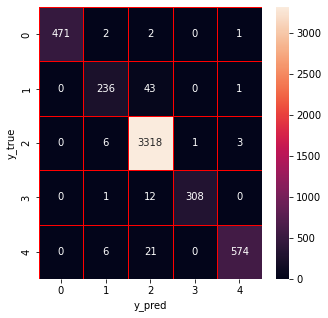

In [86]:
params = {
    'n_estimators': int(optimal_configuration['n_estimators']), 
    'min_samples_leaf': int(optimal_configuration['min_samples_leaf']), 
    'max_depth': int(optimal_configuration['max_depth']), 
    'min_samples_split': int(optimal_configuration['min_samples_split']), 
    'max_features': int(optimal_configuration['max_features']), 
    'criterion': available_criterion[int(optimal_configuration['criterion']+0.5)]
}
et_hpo = ExtraTreesClassifier(**params)
et_hpo.fit(X_train,y_train) 
et_score=et_hpo.score(X_test,y_test)
y_predict=et_hpo.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [87]:
# Add to output sheet
result_dict = {
    'Accuracy': et_score,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': fscore,
    'Time': end_time-start_time
}
output_df = output_df.append(result_dict, ignore_index=True)
# Add index name
output_index.append('ET (PSO)')

C:\Users\FOCUS\AppData\Local\Temp\ipykernel_5504\913336411.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(result_dict, ignore_index=True)


#### Hyperparameter optimization (HPO) of extra trees using Genetic Algorithm (GA)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [88]:
#Random Forest
from tpot import TPOTClassifier
# Define the hyperparameter configuration space
parameters = {
    'n_estimators': range(20,200),
    "max_features":range(1,20),
    'max_depth': range(10,100),
    "min_samples_split":range(2,11),
    "min_samples_leaf":range(1,11),
    "criterion":['gini','entropy']
             }
# Set the hyperparameters of GA                 
ga = TPOTClassifier(generations= 3, population_size= 10, offspring_size= 5,
                                 verbosity= 3, early_stop= 5,
                                 config_dict=
                                 {'sklearn.ensemble.ExtraTreesClassifier': parameters}, 
                                 cv = 3, scoring = 'accuracy')
start_time = time.time()
ga.fit(X_combined, y_combined)
end_time = time.time()

1 operators have been imported by TPOT.
                                                                                                                       
Generation 1 - Current Pareto front scores:
                                                                                                                       
-1	0.9570881330761088	ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__criterion=gini, ExtraTreesClassifier__max_depth=68, ExtraTreesClassifier__max_features=8, ExtraTreesClassifier__min_samples_leaf=4, ExtraTreesClassifier__min_samples_split=2, ExtraTreesClassifier__n_estimators=119)
                                                                                                                       
-2	0.9800623891965013	ExtraTreesClassifier(ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__criterion=entropy, ExtraTreesClassifier__max_depth=90, ExtraTreesClassifier__max_features=18, ExtraTreesClassifier__min_samples_leaf=4, ExtraTreesClassifier__min_

Accuracy of ET: 0.9838194166999601
Precision of ET: 0.983738070031325
Recall of ET: 0.9838194166999601
F1-score of ET: 0.9835976836993465
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       476
           1       0.95      0.87      0.91       280
           2       0.98      1.00      0.99      3328
           3       1.00      0.97      0.98       321
           4       0.99      0.97      0.98       601

    accuracy                           0.98      5006
   macro avg       0.98      0.96      0.97      5006
weighted avg       0.98      0.98      0.98      5006



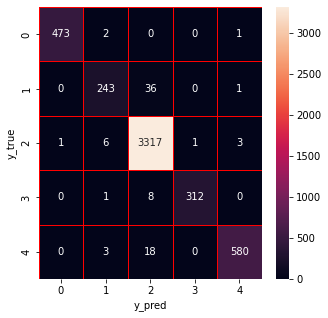

In [89]:
et_hpo = ExtraTreesClassifier(**get_ga_optimized_parameters(ga, 'ExtraTreesClassifier'))
et_hpo.fit(X_train,y_train) 
et_score=et_hpo.score(X_test,y_test)
y_predict=et_hpo.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [90]:
# Add to output sheet
result_dict = {
    'Accuracy': et_score,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': fscore,
    'Time': end_time-start_time
}
output_df = output_df.append(result_dict, ignore_index=True)
# Add index name
output_index.append('ET (GA)')

C:\Users\FOCUS\AppData\Local\Temp\ipykernel_5504\2417959707.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(result_dict, ignore_index=True)


### Apply stacking

In [91]:
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,2,2,2,2
1,0,0,0,0
2,2,2,2,2
3,2,2,2,2
4,2,2,2,2


In [92]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [93]:
dt_train.shape

(20022, 1)

In [94]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

Accuracy of Stacking: 0.9902117459049141
Precision of Stacking: 0.9901616829282035
Recall of Stacking: 0.9902117459049141
F1-score of Stacking: 0.9901472948051812
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       476
           1       0.96      0.93      0.94       280
           2       0.99      1.00      0.99      3328
           3       1.00      0.98      0.99       321
           4       0.99      0.98      0.99       601

    accuracy                           0.99      5006
   macro avg       0.99      0.98      0.98      5006
weighted avg       0.99      0.99      0.99      5006



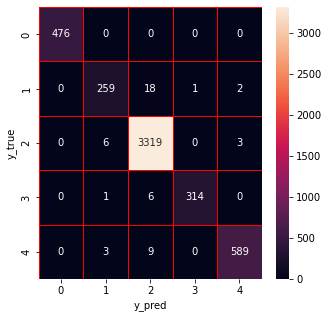

In [95]:
start_time = time.time()
stk = xgb.XGBClassifier().fit(x_train, y_train)
end_time = time.time()
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [96]:
# Add to output sheet
result_dict = {
    'Accuracy': stk_score,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': fscore,
    'Time': end_time-start_time
}
output_df = output_df.append(result_dict, ignore_index=True)
# Add index name
output_index.append('Stacking (Original)')

C:\Users\FOCUS\AppData\Local\Temp\ipykernel_5504\2158505031.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(result_dict, ignore_index=True)


#### Hyperparameter optimization (HPO) of the stacking ensemble model (XGBoost) using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [97]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate'])),

    }
    clf = xgb.XGBClassifier( **params)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
}

start_time = time.time()

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)

end_time = time.time()

print("XGBoost: Hyperopt estimated optimum {}".format(best))

100%|███████████████████████████████████████████████| 20/20 [00:03<00:00,  5.10trial/s, best loss: -0.9902117459049141]
XGBoost: Hyperopt estimated optimum {'learning_rate': -0.40724960118916514, 'max_depth': 33.0, 'n_estimators': 60.0}


Accuracy of XGBoost: 0.9902117459049141
Precision of XGBoost: 0.9901616829282035
Recall of XGBoost: 0.9902117459049141
F1-score of XGBoost: 0.9901472948051812
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       476
           1       0.96      0.93      0.94       280
           2       0.99      1.00      0.99      3328
           3       1.00      0.98      0.99       321
           4       0.99      0.98      0.99       601

    accuracy                           0.99      5006
   macro avg       0.99      0.98      0.98      5006
weighted avg       0.99      0.99      0.99      5006



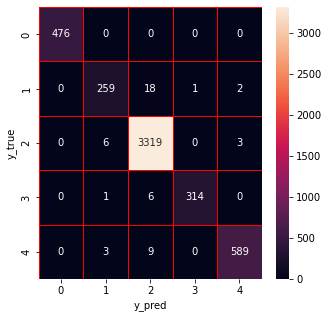

In [98]:
params = {
    'n_estimators': int(best['n_estimators']), 
    'max_depth': int(best['max_depth']),
    'learning_rate':  abs(float(best['learning_rate'])),
}
xg = xgb.XGBClassifier(**params)
xg.fit(x_train,y_train)
xg_score=xg.score(x_test,y_test)
y_predict=xg.predict(x_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [99]:
# Add to output sheet
result_dict = {
    'Accuracy': xg_score,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': fscore,
    'Time': end_time-start_time
}
output_df = output_df.append(result_dict, ignore_index=True)
# Add index name
output_index.append('Stacking (BO-TPE)')

C:\Users\FOCUS\AppData\Local\Temp\ipykernel_5504\2176909609.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(result_dict, ignore_index=True)


#### Hyperparameter optimization (HPO) of stacking ensemble model (XGBoost) using Particle Swarm Optimization (PSO)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [100]:
#XGBoost
import optunity
import optunity.metrics

data= X_combined
labels= y_combined.tolist()
Y_train = y_train
Y_test = y_test
# Define the hyperparameter configuration space
search = {
    'n_estimators': [10, 100],
    'max_depth': [5,50],
    'learning_rate': [0.01, 0.9]
}
# Define the objective function
@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance(x_train, y_train, x_test, y_test,n_estimators=None, max_depth=None,learning_rate=None):
    # fit the model
    params = {
        'n_estimators': int(n_estimators), 
        'max_depth': int(max_depth),
        'learning_rate':  abs(float(learning_rate)),
    }
    model = xgb.XGBClassifier( **params)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    # scores=np.mean(cross_val_score(model, X, y, cv=3, n_jobs=-1,
    #                                 scoring="accuracy"))
    #return optunity.metrics.roc_auc(y_test, predictions, positive=True)
    return optunity.metrics.accuracy(Y_test, predictions)

start_time = time.time()

optimal_configuration, info, _ = optunity.maximize(performance,
                                                  solver_name='particle swarm',
                                                  num_evals=20,
                                                   **search
                                                  )

end_time = time.time()

print(optimal_configuration)
print("Accuracy:"+ str(info.optimum))

{'n_estimators': 86.0693359375, 'max_depth': 20.53466796875, 'learning_rate': 0.7144384765625}
Accuracy:0.9898122253296044


Accuracy of XGBoost: 0.9902117459049141
Precision of XGBoost: 0.9901616829282035
Recall of XGBoost: 0.9902117459049141
F1-score of XGBoost: 0.9901472948051812
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       476
           1       0.96      0.93      0.94       280
           2       0.99      1.00      0.99      3328
           3       1.00      0.98      0.99       321
           4       0.99      0.98      0.99       601

    accuracy                           0.99      5006
   macro avg       0.99      0.98      0.98      5006
weighted avg       0.99      0.99      0.99      5006



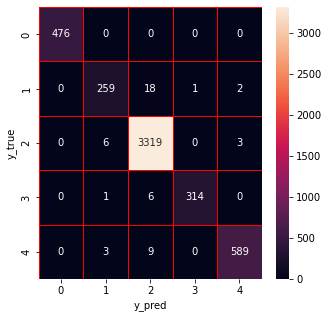

In [101]:
params = {
    'n_estimators': int(optimal_configuration['n_estimators']), 
    'max_depth': int(optimal_configuration['max_depth']), 
    'learning_rate': abs(float(optimal_configuration['learning_rate']))
}
xg = xgb.XGBClassifier(**params)
xg.fit(x_train,y_train)
xg_score=xg.score(x_test,y_test)
y_predict=xg.predict(x_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [102]:
# Add to output sheet
result_dict = {
    'Accuracy': xg_score,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': fscore,
    'Time': end_time-start_time
}
output_df = output_df.append(result_dict, ignore_index=True)
# Add index name
output_index.append('Stacking (PSO)')

C:\Users\FOCUS\AppData\Local\Temp\ipykernel_5504\1408219009.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(result_dict, ignore_index=True)


#### Hyperparameter optimization (HPO) of stacking ensemble model (XGBoost) using Genetic Algorithm (GA)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [103]:
#XGBoost
from tpot import TPOTClassifier
# Define the hyperparameter configuration space
parameters = {
    'n_estimators': range(10,100),
    'max_depth': range(4,100),
    'learning_rate': [i/100 for i in range(1, 90)]
}
# Set the hyperparameters of GA                 
ga = TPOTClassifier(generations= 3, population_size= 10, offspring_size= 5,
                                 verbosity= 3, early_stop= 5,
                                 config_dict=
                                 {'xgboost.XGBClassifier': parameters}, 
                                 cv = 3, scoring = 'accuracy')
start_time = time.time()
ga.fit(X_combined, y_combined)
end_time = time.time()

1 operators have been imported by TPOT.
                                                                                                                       
Generation 1 - Current Pareto front scores:
                                                                                                                       
-1	0.9877337637178082	XGBClassifier(input_matrix, XGBClassifier__learning_rate=0.66, XGBClassifier__max_depth=4, XGBClassifier__n_estimators=85)
                                                                                                                       
Generation 2 - Current Pareto front scores:
                                                                                                                       
-1	0.9877337637178082	XGBClassifier(input_matrix, XGBClassifier__learning_rate=0.66, XGBClassifier__max_depth=4, XGBClassifier__n_estimators=85)
                                                                                                      

Accuracy of XGBoost: 0.9902117459049141
Precision of XGBoost: 0.9901616829282035
Recall of XGBoost: 0.9902117459049141
F1-score of XGBoost: 0.9901472948051812
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       476
           1       0.96      0.93      0.94       280
           2       0.99      1.00      0.99      3328
           3       1.00      0.98      0.99       321
           4       0.99      0.98      0.99       601

    accuracy                           0.99      5006
   macro avg       0.99      0.98      0.98      5006
weighted avg       0.99      0.99      0.99      5006



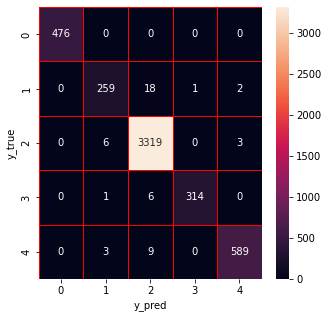

In [104]:
xg = xgb.XGBClassifier(**get_ga_optimized_parameters(ga, 'XGBClassifier'))
xg.fit(x_train,y_train)
xg_score=xg.score(x_test,y_test)
y_predict=xg.predict(x_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [105]:
# Add to output sheet
result_dict = {
    'Accuracy': xg_score,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': fscore,
    'Time': end_time-start_time
}
output_df = output_df.append(result_dict, ignore_index=True)
# Add index name
output_index.append('Stacking (GA)')

C:\Users\FOCUS\AppData\Local\Temp\ipykernel_5504\1928403416.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append(result_dict, ignore_index=True)


In [107]:
# Rename the index
output_df.index = output_index
# Save the result to file
import datetime
output_df.to_excel('result-{}.xlsx'.format(datetime.datetime.now().strftime('%y%m%d-%H%M%S')))